# Classification Model

***Loan Case Prediction***

In [329]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [330]:
# reading data set
df = pd.read_csv('loan.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [331]:
df.shape

(346, 10)

In [332]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [333]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [334]:
# Convert to 'effective_date' & 'due_date' to date time object
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

In [335]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

In [336]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male


# Data visualization and pre-processing

Let’s see how many of each class is in our data set

In [337]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection.

Let's plot some columns to underestand data better:

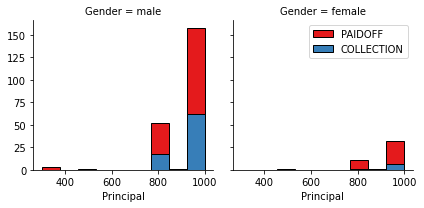

In [338]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set1", col_wrap = 2)
g.map(plt.hist, 'Principal', bins = bins, ec = "black")

g.axes[-1].legend()
plt.show()

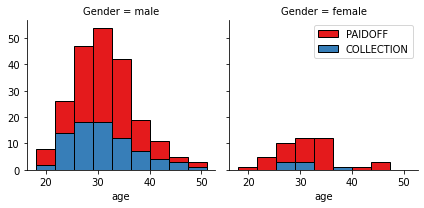

In [339]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set1", col_wrap = 2)
g.map(plt.hist, 'age', bins = bins, ec = "black")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Let's look at the day of the week people get the loan

In [340]:
df['dayofweek'] = df['effective_date'].dt.dayofweek

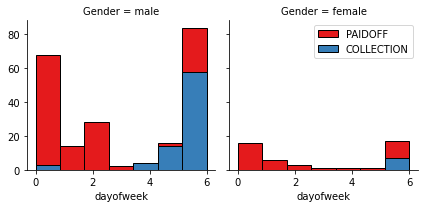

In [341]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 8)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set1", col_wrap = 2)
g.map(plt.hist, 'dayofweek', bins = bins, ec = "black")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4.

In [342]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x > 3) else 0)

In [343]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Let's look at gender:

In [344]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize = True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan.

Let's convert male to 0 and female to 1:

In [345]:
df['Gender'].replace(['male','female'],[0,1], inplace = True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?

In [346]:
df.groupby(['education'])['loan_status'].value_counts(normalize = True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding

In [347]:
df[['Principal','terms','age','Gender','weekend','education']].head()

,Principal,terms,age,Gender,weekend,education
0,1000,30,45,0,0,High School or Below
1,1000,30,33,1,0,Bechalor
2,1000,15,27,0,0,college
3,1000,30,28,1,1,college
4,1000,30,29,0,1,college


In [348]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature.head(1)

,Principal,terms,age,Gender,weekend
0,1000,30,45,0,0


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [349]:
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis = 1)
Feature.drop(['Master or Above'], axis = 1, inplace = True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection

Let's define feature sets, X:

In [350]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [351]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Splitting Data into Train & Test

In [352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (276, 8) (276,)
Test Set:  (70, 8) (70,)


## Normalization

In [353]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [354]:
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [355]:
# importing modules to test the accuracy
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

# Building Models

## K Nearest Neighbour (KNN)

In [356]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [357]:
yhatKNN=neigh.predict(X_test)
KNNJaccard = jaccard_score(y_test, yhatKNN, pos_label = "PAIDOFF")
KNNF1 = f1_score(y_test, yhatKNN, average='weighted')
KNNac = metrics.accuracy_score(y_test, yhatKNN)
print("Avg F1-score: %.2f" % KNNF1 )
print("KNN Jaccard Score: %.2f" % KNNJaccard)
print("Accuracy Score: %.2f" % KNNac)

Avg F1-score: 0.69
KNN Jaccard Score: 0.74
Accuracy Score: 0.74


## Decision Tree

In [358]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
Tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [359]:
yhatDEC = Tree.predict(X_test)
DTJaccard = jaccard_score(y_test, yhatDEC, pos_label = "PAIDOFF")
DTF1 = f1_score(y_test, yhatDEC, average='weighted')
DTac = metrics.accuracy_score(y_test, yhatDEC)
print("Avg F1-score: %.2f" % DTF1 )
print("Decision Tree Jaccard Score: %.2f" % DTJaccard)
print("Accuracy Score: %.2f" % DTac)

Avg F1-score: 0.71
Decision Tree Jaccard Score: 0.77
Accuracy Score: 0.77


## Support Vector Machine (SVM)

In [360]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

SVC()

In [361]:
yhatSVM=clf.predict(X_test)
SVMJaccard = jaccard_score(y_test, yhatSVM, pos_label = "PAIDOFF")
SVMF1 = f1_score(y_test, yhatSVM, average='weighted')
SVMac = metrics.accuracy_score(y_test, yhatSVM)
print("Avg F1-score: %.2f" % SVMF1)
print("SVM Jaccard score: %.2f" % SVMJaccard)
print("Accuracy Score: %.2f" % SVMac)

Avg F1-score: 0.69
SVM Jaccard score: 0.79
Accuracy Score: 0.79


## Logistic Regression

In [362]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(C = 0.1, solver = 'liblinear')
LogR.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [363]:
yhatLOG = LogR.predict(X_test)
yhatLOGproba = LogR.predict_proba(X_test)
LogRJaccard = jaccard_score(y_test, yhatLOG, pos_label = "PAIDOFF")
LogRF1 = f1_score(y_test, yhatLOG, average='weighted')
Logloss = log_loss(y_test, yhatLOGproba)
Logac = metrics.accuracy_score(y_test, yhatLOG)
print("LogLoss: : %.2f" % Logloss)
print("Avg F1-score: %.4f" % LogRF1)
print("LOG Jaccard score: %.4f" % LogRJaccard)
print("Accuracy Score: %.2f" % Logac)

LogLoss: : 0.51
Avg F1-score: 0.6771
LOG Jaccard score: 0.7571
Accuracy Score: 0.76


## Random Forest Classification

In [364]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 6)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=10)

In [365]:
yhatRF=forest.predict(X_test)
RFCJaccard = jaccard_score(y_test, yhatRF, pos_label = "PAIDOFF")
RFCF1 = f1_score(y_test, yhatRF, average='weighted')
RFac = metrics.accuracy_score(y_test, yhatRF)
print("Avg F1-score: %.2f" % RFCF1)
print("SVM Jaccard score: %.2f" % RFCJaccard)
print("Accuracy Score: %.2f" % RFac)

Avg F1-score: 0.70
SVM Jaccard score: 0.70
Accuracy Score: 0.71


## XGBoost Classification

In [366]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 8, max_depth = 5)
xgb.fit(X_train, y_train)

[14:35:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [367]:
yhatXGB=xgb.predict(X_test)
XGBJaccard = jaccard_score(y_test, yhatXGB, pos_label = "PAIDOFF")
XGBF1 = f1_score(y_test, yhatXGB, average='weighted')
XGBac = accuracy_score(y_test, yhatXGB)
print("Avg F1-score: %.2f" % XGBF1)
print("SVM Jaccard score: %.2f" % XGBJaccard)
print("Accuracy Score: %.2f" % XGBac)

Avg F1-score: 0.74
SVM Jaccard score: 0.74
Accuracy Score: 0.76


## Naive Bayes Classifier

In [368]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [369]:
yhatNB=gnb.predict(X_test)
NBJaccard = jaccard_score(y_test, yhatNB, pos_label = "PAIDOFF")
NBF1 = f1_score(y_test, yhatNB, average='weighted')
NBac = accuracy_score(y_test, yhatNB)
print("Avg F1-score: %.2f" % NBF1)
print("SVM Jaccard score: %.2f" % NBJaccard)
print("Accuracy Score: %.2f" % NBac)

Avg F1-score: 0.64
SVM Jaccard score: 0.53
Accuracy Score: 0.60


| Algorithm          | Jaccard | F1-score | LogLoss | Accuracy Score |
| ------------------ | ------- | -------- | ------- | -------------- |
| KNN                | 0.74    | 0.69     | NA      | 0.74           |
| Decision Tree      | 0.77    | 0.71     | NA      | 0.77           |
| SVM                | 0.79    | 0.69     | NA      | 0.78           |
| LogisticRegression | 0.67    | 0.51     | 0.75    | 0.75           |
| RandomForest       | 0.74    | 0.69     | NA      | 0.74           |
| XGBoost            | 0.74    | 0.74     | NA      | 0.75           |
| Naive Bayes        | 0.53    | 0.64     | NA      | 0.60           |    

We se that the **Support Vector Machine** has the best result compared to the other models.